In [1]:
# Importando as blibliotecas necessárias para análise de dados e visualização

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Carregando o dataset e verificando as primeiras linhas

df = pd.read_excel(r"C:\Users\dorri\Desktop\mediarates.xlsx")
df.head()

,user_id,post_type,post_length,likes,comments,shares,engagement_rate,user_followers,post_category,post_hour,is_weekend,user_verified,spam_flag
0,1,video,287.0,306,52,35,4.457269,9204,fashion,3,0,0,0
1,2,text,149.0,330,78,36,4.845244,596,sports,7,0,1,0
2,3,video,222.0,460,78,40,2.037067,1563,food,12,1,1,1
3,4,video,185.0,265,3,16,2.023281,6928,sports,9,1,0,0
4,5,text,270.0,397,95,34,0.531913,4353,food,17,1,1,1


In [3]:
# Verificando as informações gerais do DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_id          2000 non-null   int64  
 1   post_type        2000 non-null   object 
 2   post_length      1900 non-null   float64
 3   likes            2000 non-null   int64  
 4   comments         2000 non-null   int64  
 5   shares           2000 non-null   int64  
 6   engagement_rate  1900 non-null   float64
 7   user_followers   2000 non-null   int64  
 8   post_category    2000 non-null   object 
 9   post_hour        2000 non-null   int64  
 10  is_weekend       2000 non-null   int64  
 11  user_verified    2000 non-null   int64  
 12  spam_flag        2000 non-null   int64  
dtypes: float64(2), int64(9), object(2)
memory usage: 203.3+ KB


In [4]:
# Transformando as colunas numéricas para o tipo adequado e as colunas binárias para booleanas

df['post_length'] = df['post_length'].astype('Int64')
df['is_weekend'] = df['is_weekend'].astype('bool')
df['user_verified'] = df['user_verified'].astype('bool')
df['spam_flag'] = df['spam_flag'].astype('bool')

In [5]:
# Validando as alterações

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_id          2000 non-null   int64  
 1   post_type        2000 non-null   object 
 2   post_length      1900 non-null   Int64  
 3   likes            2000 non-null   int64  
 4   comments         2000 non-null   int64  
 5   shares           2000 non-null   int64  
 6   engagement_rate  1900 non-null   float64
 7   user_followers   2000 non-null   int64  
 8   post_category    2000 non-null   object 
 9   post_hour        2000 non-null   int64  
 10  is_weekend       2000 non-null   bool   
 11  user_verified    2000 non-null   bool   
 12  spam_flag        2000 non-null   bool   
dtypes: Int64(1), bool(3), float64(1), int64(6), object(2)
memory usage: 164.2+ KB


In [6]:
# Verificando os dados estatísticos do DataFrame

df.describe()

,user_id,post_length,likes,comments,shares,engagement_rate,user_followers,post_hour
count,2000.000000,1900.0,2000.000000,2000.000000,2000.000000,1900.000000,2000.000000,2000.000000
mean,1000.500000,174.162632,247.492000,49.600500,24.164500,2.693385,5026.938000,11.745000
std,577.494589,71.251606,144.747846,28.628844,14.419862,1.289315,2879.222375,6.840349
min,1.000000,50.0,0.000000,0.000000,0.000000,0.501085,107.000000,0.000000
25%,500.750000,114.0,120.000000,24.000000,12.000000,1.579119,2467.500000,6.000000
50%,1000.500000,176.0,246.500000,50.000000,24.000000,2.683675,5096.500000,12.000000
75%,1500.250000,233.0,374.000000,75.000000,37.000000,3.810330,7491.750000,18.000000
max,2000.000000,299.0,499.000000,99.000000,49.000000,4.997573,9995.000000,23.000000


In [7]:
# Verificando a presença de valores ausentes

df.isna().sum()

user_id              0
post_type            0
post_length        100
likes                0
comments             0
shares               0
engagement_rate    100
user_followers       0
post_category        0
post_hour            0
is_weekend           0
user_verified        0
spam_flag            0
dtype: int64

Identificamos 100 valores ausentes nas colunas Post_lenght e em Engagement_rate, vamos verificar quais linhas estão com valores ausentes posteriormente.

In [8]:
# Verificando a presença de duplicatas

df.duplicated().sum()

0

In [9]:
# Encontrando as linhas com valores ausentes

print(df[df.isna().any(axis=1)])


      user_id post_type  post_length  likes  comments  shares  \
14         15     image         <NA>    453         0      30   
18         19     image         <NA>     92        69      22   
19         20     image         <NA>    165        20      17   
44         45      text         <NA>    293        19       0   
59         60     video         <NA>    187        12      26   
...       ...       ...          ...    ...       ...     ...   
1842     1843     video         <NA>    238        17      29   
1864     1865     video         <NA>    338        73      41   
1910     1911     image         <NA>    208        14       1   
1913     1914     video         <NA>    210        34      45   
1918     1919      text         <NA>     70        99      17   

      engagement_rate  user_followers post_category  post_hour  is_weekend  \
14                NaN            7730       fashion         14        True   
18                NaN             307          food         14 

Foi possível identificar que os valores ausentes estão presentes em ambas as colunas na mesma linha, onde tem valor ausente no post_length também tem valor ausente em engagement_rate. Vou excluir essas linhas para não influenciarem na análise final e também por representarem apenas 5% dos dados totais.

In [10]:
# Excluindo as linhas com valores ausentes, pois representam 5% dos dados totais e não queremos que influenciem na análise final

df.dropna(inplace=True)

In [11]:
# Verificando a presença de valores ausentes para validar a exclusão

df.isna().sum()

user_id            0
post_type          0
post_length        0
likes              0
comments           0
shares             0
engagement_rate    0
user_followers     0
post_category      0
post_hour          0
is_weekend         0
user_verified      0
spam_flag          0
dtype: int64

In [12]:
# Deletando as colunas que não serão utilizadas na análise
df.drop(columns=['is_weekend', 'user_verified', 'post_length'], inplace=True)

In [13]:
# Forma final do DataFrame

df.shape

(1900, 10)

Vamos iniciar a criação das nossas visualizações para análise

C:\Users\dorri\AppData\Local\Temp\ipykernel_15808\4069042168.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, y='post_category', x='engagement_rate', palette='Set3', orient='h')


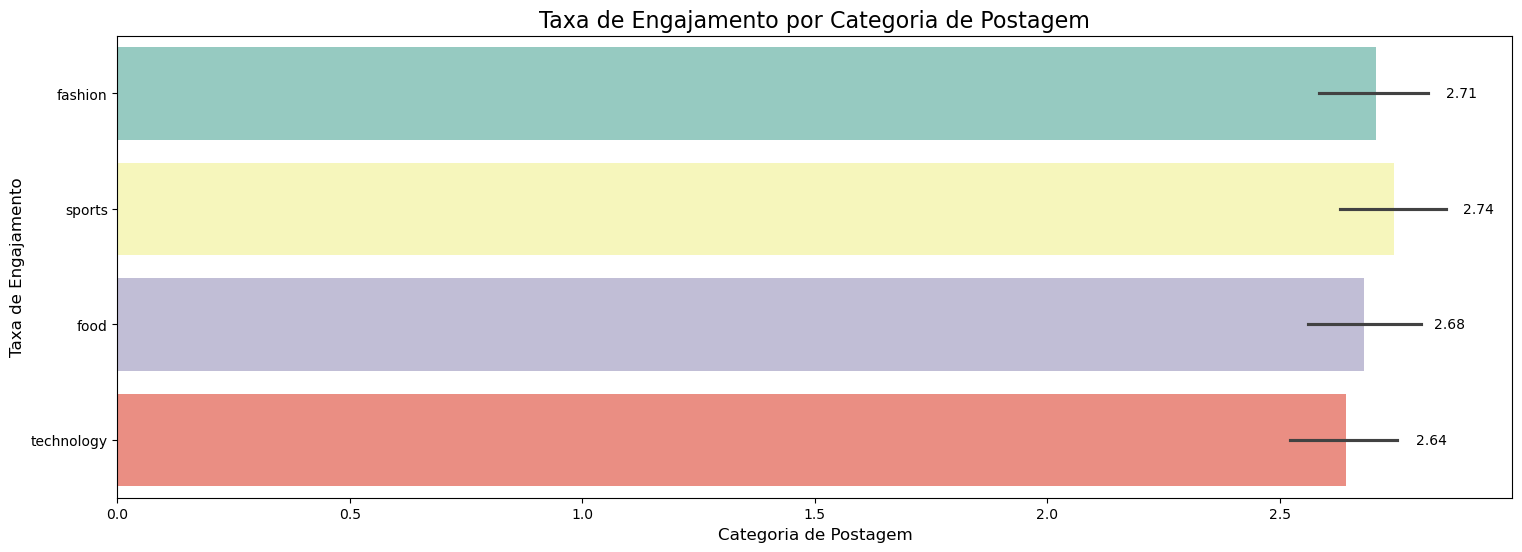

In [68]:
# Visualizando a distribuição da taxa de engajamento por Categoria de Postagem

plt.figure(figsize=(18, 6))
ax = sns.barplot(data=df, y='post_category', x='engagement_rate', palette='Set3', orient='h')
plt.title('Taxa de Engajamento por Categoria de Postagem', fontsize=16)
plt.xlabel('Categoria de Postagem', fontsize=12)
plt.ylabel('Taxa de Engajamento', fontsize=12)

for container in ax.containers:
    ax.bar_label(container, padding=50, fontsize=10, fmt='%.2f')

plt.show()

### Análise de Engajamento por Categoria:

A análise dos dados revela que a categoria Esportes apresenta o melhor desempenho em taxa de engajamento, seguida de perto pelas categorias Fashion, que mostra um resultado bem próximo. Em contraste, a categoria Tecnologia e Comida registram os indicadores mais baixos de engajamento.

Insight estratégico: Para potencializar o desempenho da categoria de Tecnologia, recomenda-se a criação de conteúdos híbridos que integrem tecnologia com outras áreas de maior engajamento. Por exemplo:

- Tecnologia aplicada ao Esporte (análise de desempenho atlético)

- Tecnologia na Comida (novas tecnologias no setor)

C:\Users\dorri\AppData\Local\Temp\ipykernel_15808\3217676958.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, y='post_type', x='user_followers', palette='Set2', orient='h')


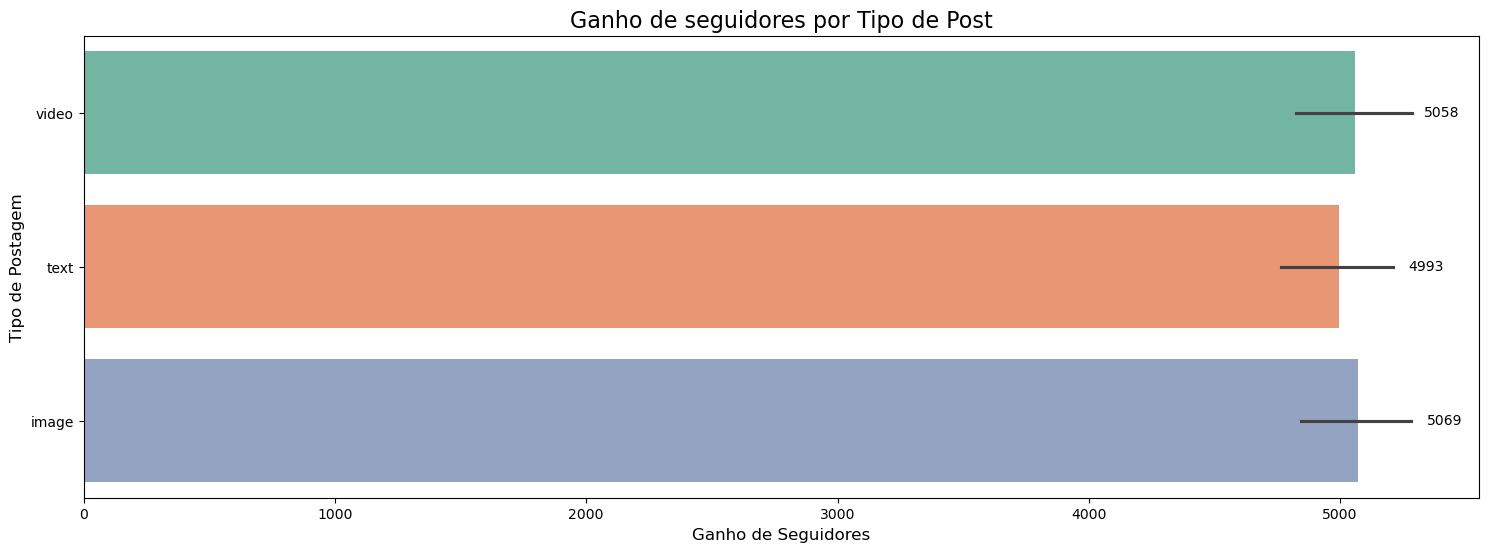

In [69]:
# Visualizando o ganho de seguidores por Tipo de Post

plt.figure(figsize=(18, 6))
ax = sns.barplot(data=df, y='post_type', x='user_followers', palette='Set2', orient='h')
plt.title('Ganho de seguidores por Tipo de Post', fontsize=16)
plt.xlabel('Ganho de Seguidores', fontsize=12)
plt.ylabel('Tipo de Postagem', fontsize=12)

for container in ax.containers:
    ax.bar_label(container, padding=50, fontsize=10, fmt='%d')

plt.show()

### Análise de Ganho de Seguidores por Tipo de Post

O ganho de seguidores não tem diferença significativa neste dataset, porém mesmo com essa pequena diferença o conteúdo áudio-visual ainda tem vantagem quanto ao conteúdo textual.

C:\Users\dorri\AppData\Local\Temp\ipykernel_15808\162400401.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, y='post_category', x='user_followers', palette='Set3', orient='h')


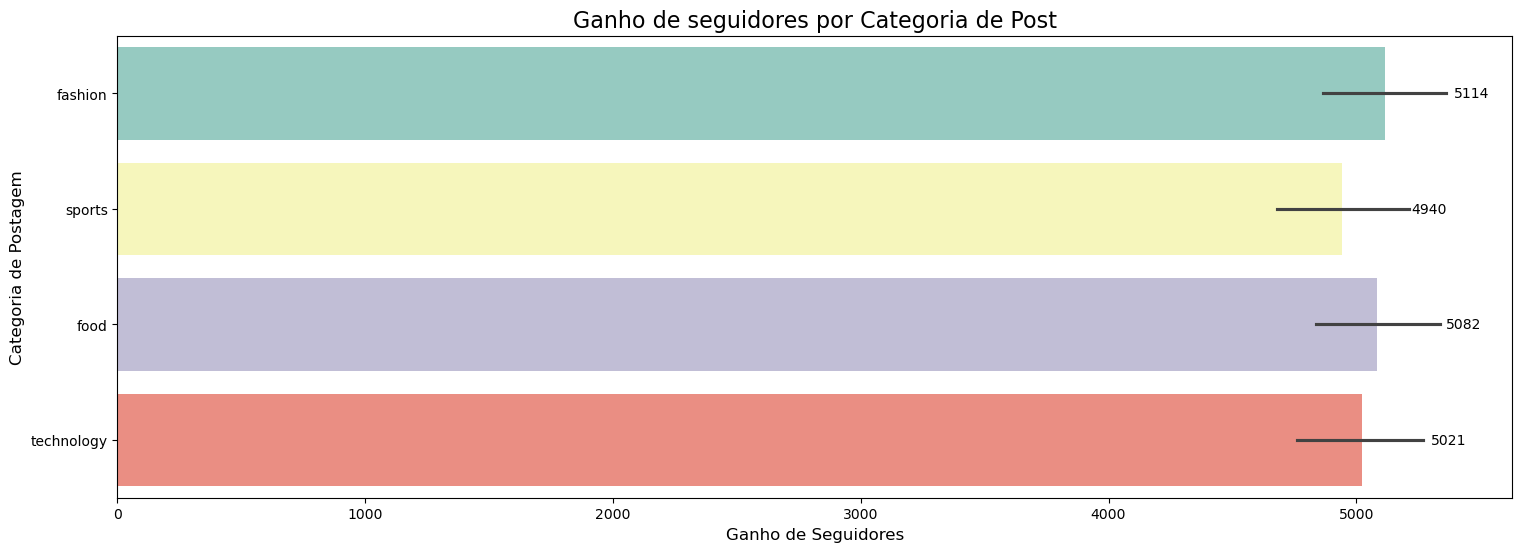

In [71]:
# Visualizando o ganho de seguidores por Categoria de Post

plt.figure(figsize=(18, 6))
ax = sns.barplot(data=df, y='post_category', x='user_followers', palette='Set3', orient='h')
plt.title('Ganho de seguidores por Categoria de Post', fontsize=16)
plt.xlabel('Ganho de Seguidores', fontsize=12)
plt.ylabel('Categoria de Postagem', fontsize=12)

for container in ax.containers:
    ax.bar_label(container, padding=50, fontsize=10, fmt='%d')

plt.show()

### Análise de Ganho de Seguidores por Categoria de Post

Os dados revelam um cenário intrigante, enquanto a categoria Esportes lidera em taxa de engajamento, mostra-se menos eficaz na atração de novos seguidores, ocupando a última posição neste aspecto. Em contrapartida, o conteúdo de Fashion, embora apresente menor engajamento, destaca-se como o mais eficiente para conquistar novos seguidores. 

Implicações Práticas 

Para objetivos de engajamento (curtidas, comentários, shares):
- Priorizar conteúdos esportivos
- Aproveitar momentos de grandes eventos esportivos  

Para crescimento de base (aquisição de seguidores):
- Investir em postagens de moda e lifestyle  
- Desenvolver séries regulares de conteúdo fashion 

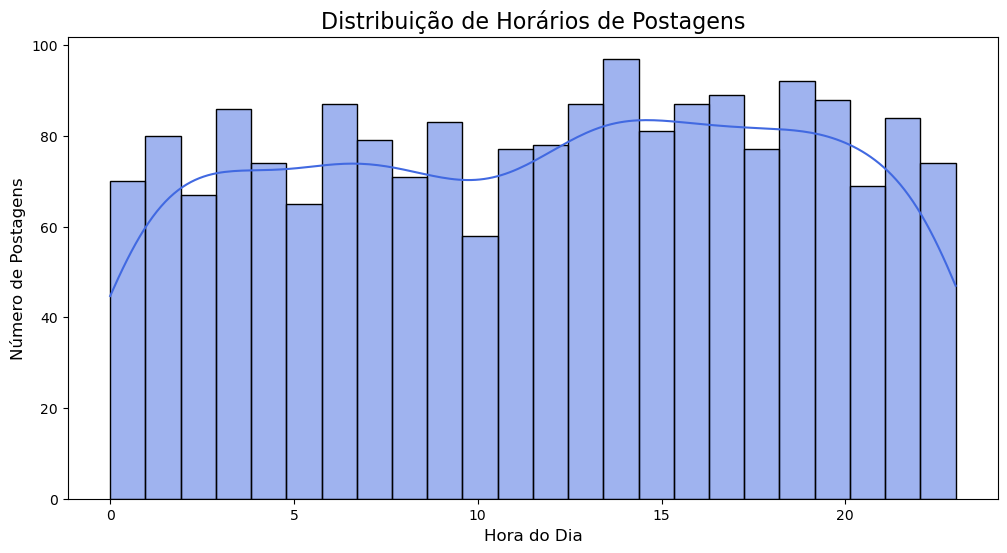

In [88]:
# Visualizando a distribuição de Horários de Postagens

plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='post_hour', color='royalblue', kde=True, bins =24)
plt.title('Distribuição de Horários de Postagens', fontsize=16)
plt.xlabel('Hora do Dia', fontsize=12)
plt.ylabel('Número de Postagens', fontsize=12)
plt.show()

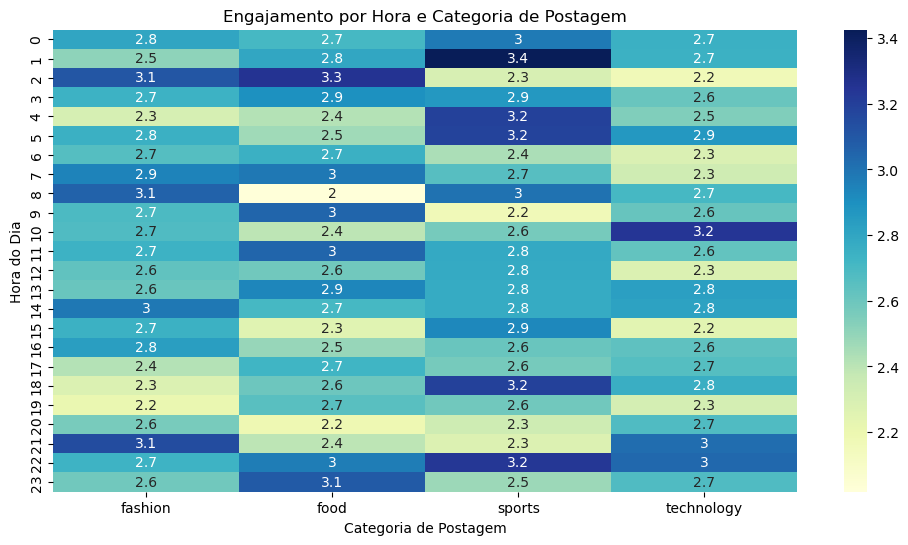

In [90]:
# Visualizando o desempenho de posts por Categoria e sua Taxa de Engajamento em cada hora do dia

plt.figure(figsize=(12, 6))
pivot = df.pivot_table(values='engagement_rate', index='post_hour', columns='post_category')
sns.heatmap(pivot, cmap="YlGnBu", annot=True)
plt.title("Engajamento por Hora e Categoria de Postagem")
plt.xlabel("Categoria de Postagem")
plt.ylabel("Hora do Dia")
plt.show()

### Análise da efetividade dos posts ao longo do dia

Podemos identificar no Histograma das postagens uma menor concentração de posts nos horários das 6h e 11h da manhã, o que confirma a baixa de engajamento no mapa de calor (com temas abaixo da média de 2.5 no intervalo), para contornar esse problema o ideal seria trabalhar mais os conteúdos de tema Fashion e Comida que apresentam maior taxa de engajamento nestes horários com menos volume de posts e também propor posts com temas cruzados entre eles.

No começo da tarde a partir das 14h o volume de postagens é o maior encontrado com todos os temas tendo uma taxa de engajamento bem próxima entre eles, porém podemos encontrar novas oportunidades com altas taxas de engajamento, como por exemplo o ínicio e fim da madrugada onde o conteúdo de Esportes tem um boom de engajamento (taxa de engajamento acima de 3, maior que a média geral nestes intervalos) além dos conteúdos de Comida, para os famintos da madrugada! 

É interessante explorar esses insights para entender o que os usuários consomem de conteúdo em diferentes horários do dia e criar as pautas de conteúdo com base em dados.

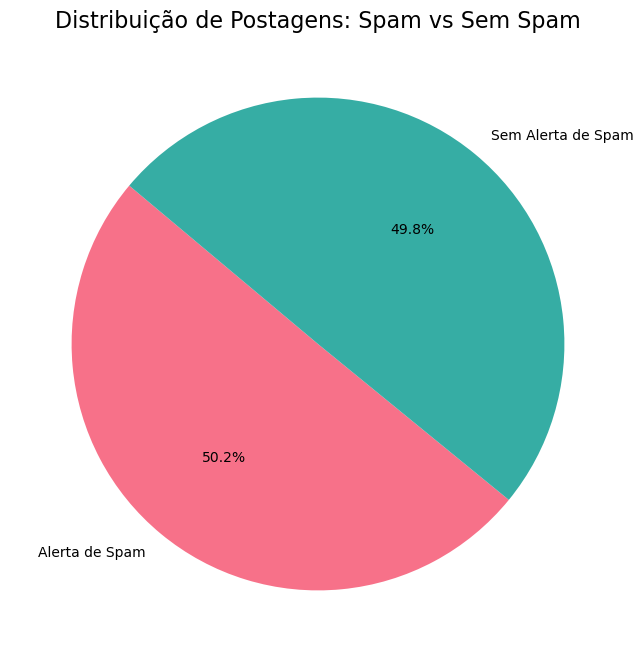

In [91]:
# Visualizando a distribuição de postagens: Spam vs Sem Spam

plt.figure(figsize=(12, 8))
spam_counts = df['spam_flag'].value_counts()
labels = ['Alerta de Spam', 'Sem Alerta de Spam']
plt.pie(spam_counts, labels=labels, autopct='%1.1f%%', colors=sns.color_palette('husl', 2), startangle=140)
plt.title('Distribuição de Postagens: Spam vs Sem Spam', fontsize=16)
plt.show()

### Análise da Distribuição de Postagens com Spam

É preocupante para uma rede social que mais da metade dos posts apresentem Spam Flag, é importante monitorar esses bots, perfis falsos e links inseguros que interagem nas postagens, essa prática arruina a experiência dos verdadeiros usuários além de que as ferramentas acabam diminuindo a entrega dos conteúdos orgânicos afetados por spam, existem configurações que auxiliam na diminuição e podem melhorar a qualidade e segurança da conta.

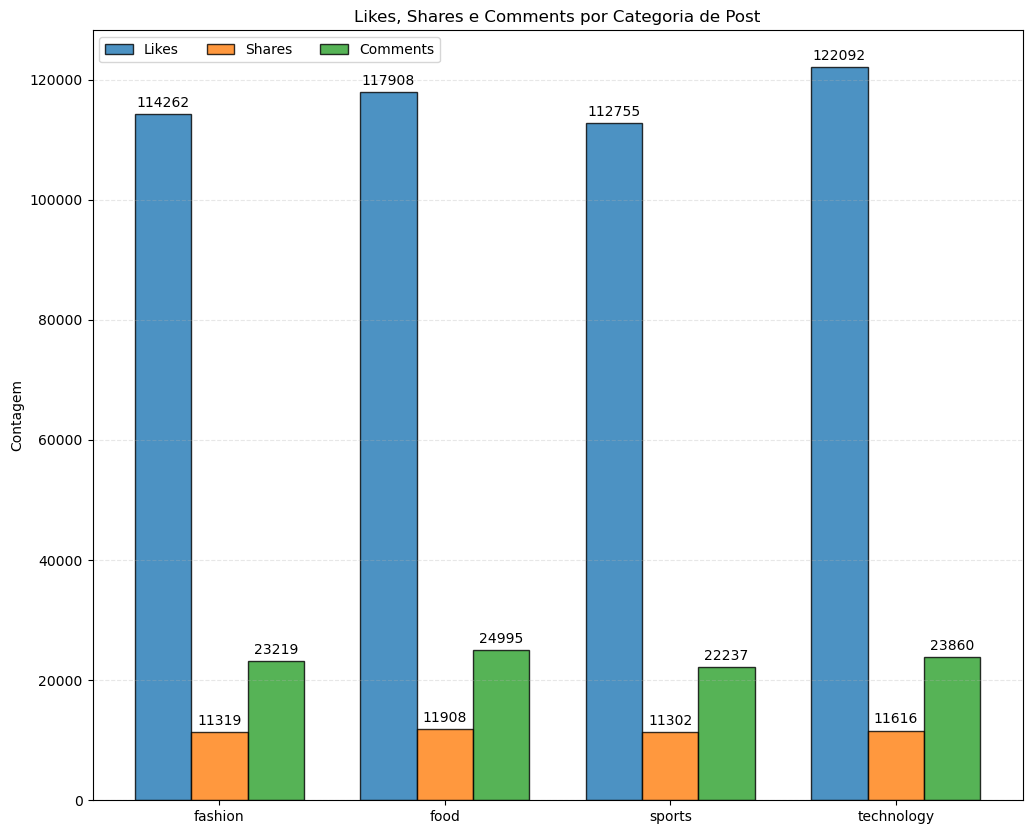

In [ ]:
# Agrupando os dados por categoria de post e somando as métricas de likes, shares e comments para criar um gráfico de barras agrupado para visualização e análise

grouped = df.groupby('post_category')[['likes', 'shares', 'comments']].sum()

categories = grouped.index
x = np.arange(len(categories))
width = 0.25

fig, ax = plt.subplots(figsize=(12, 10))

rects1 = ax.bar(x - width, grouped['likes'], width, label='Likes', edgecolor='black', alpha=0.8)
rects2 = ax.bar(x, grouped['shares'], width, label='Shares', edgecolor='black', alpha=0.8)
rects3 = ax.bar(x + width, grouped['comments'], width, label='Comments', edgecolor='black', alpha=0.8)

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)

ax.set_ylabel('Contagem')
ax.set_title('Likes, Shares e Comments por Categoria de Post')
ax.set_xticks(x, categories)
ax.legend(loc='upper left', ncols=3)
ax.grid(axis='y', linestyle='--', alpha=0.3)

plt.show()


### Análise das Métricas de Engajamento

- Média de Likes: 116.754,25
- Média de Compartilhamentos: 11.536,25
- Média de Comentários: 23.577,75

O conteúdo de Tecnologia domina em Likes com valor 10% acima da média geral. 
Os compartilhamentos e comentários apresentam valores bem próximos da média geral, tendo maior relevância em posts de Comida (quem não gosta de compartilhar ou marcar um amigo em uma receita, não é?)

Essa visualização ajuda a entender melhor o desempenho de cada categoria de post e pensar em estratégias que melhorem os indicadores baseando se também no que funciona naquelas categorias que apresentam desempenho acima da média.